# Classification

We will use classification methods to see if classification based on brain strucutres improve after subtyping. We used an SVM with 5-fold cross-validation, class-weithing and threshold tuning.

In [1]:
import os
os.chdir('/Volumes/methlab/Students/Jente/Scripts/python_scripts/SVM')

import pandas as pd
import numpy as np

# Import functions
from utils import SVM


In [3]:
# Load data for classification with subtypes and TC
Data = pd.read_csv('/Volumes/methlab/Students/Jente/Scripts/python_scripts/SVM/Data.csv')

# Filter data so we have two dataframes with only subtype 1 and TC or only subtype 2 and TC
Data1 = Data[(Data["classification_model"] == 1) | (Data["classification_model"] == 0)]

Data2 = Data[(Data["classification_model"] == 2) | (Data["classification_model"] == 0)]
Data2.loc[Data2["classification_model"] == 2, "classification_model"] = 1
Data2 = Data2.sort_values("classification_model", ascending = False)


Data1and2 = Data[Data['classification_model'].isin([1, 2])]
Data1and2.loc[Data1and2["classification_model"] == 2, "classification_model"] = 0
Data1and2 = Data1and2.sort_values("classification_model", ascending = False)


## Create features and target data

x1 = np.array(Data1.iloc[:,6:-1])
y1 = np.array(Data1["classification_model"])


x2 = np.array(Data2.iloc[:,6:-1])
y2 = np.array(Data2["classification_model"])


x1and2 = np.array(Data1and2.iloc[:,6:-1])
y1and2 = np.array(Data1and2["classification_model"])



In [4]:
# Load data for classification without subtypes
DataTC = pd.read_csv('/Volumes/methlab/Students/Jente/Scripts/python_scripts/SVM/Data.csv')

#Change all 1 and 2 to 1 for ASD
DataTC['classification_model'] = DataTC['classification_model'].replace({2: 1})


## Create features and target data

xTC = np.array(DataTC.iloc[:,6:-1])
yTC = np.array(DataTC["classification_model"])


## Run SVM

In [ ]:
# Set which kernel want to use
kernel = "rbf"

Optimal decision threshold: 0.28
Precision: 0.48
Recall: 0.83
Balanced accuracy: 0.65
Accuracy: 0.61
ROC AUC: 0.65


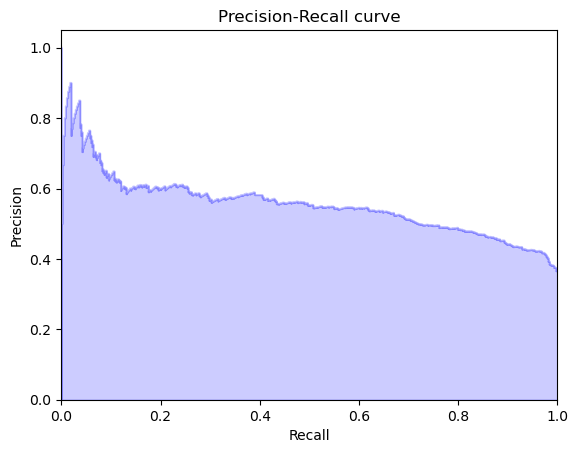

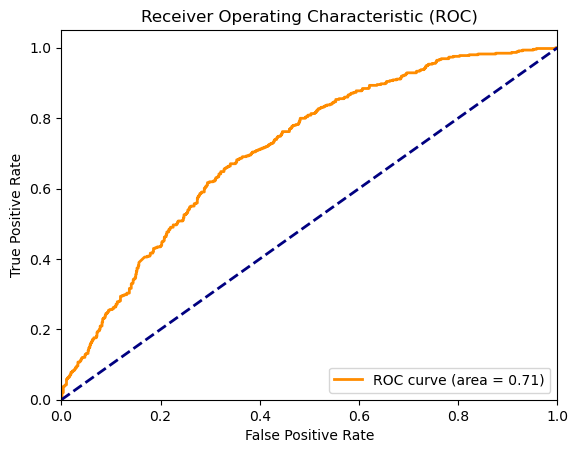

In [5]:
# Classification all autism and TCs
SVM(xTC,yTC, kernel = kernel, C=1, cv = 5)


Optimal decision threshold: 0.16
Precision: 0.27
Recall: 0.52
Balanced accuracy: 0.66
Accuracy: 0.77
ROC AUC: 0.66


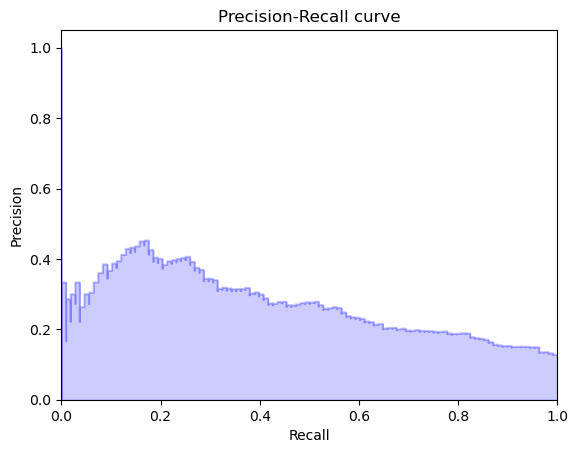

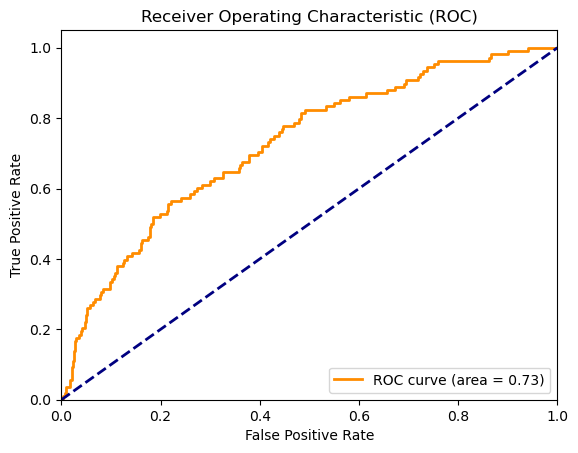

In [6]:
# Classification of subtype 1 and TC
SVM(x1, y1, kernel = kernel, C=1)



Optimal decision threshold: 0.26
Precision: 0.42
Recall: 0.77
Balanced accuracy: 0.65
Accuracy: 0.60
ROC AUC: 0.65


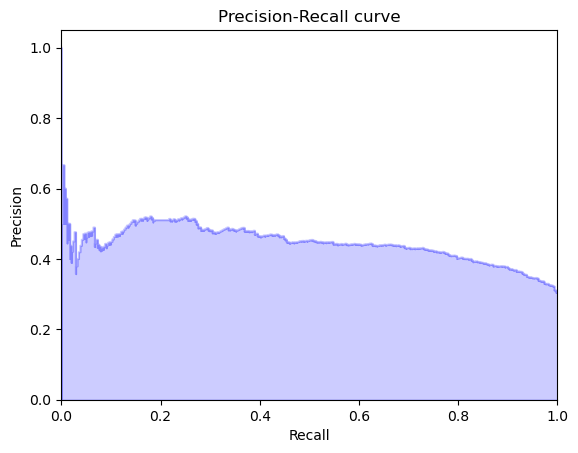

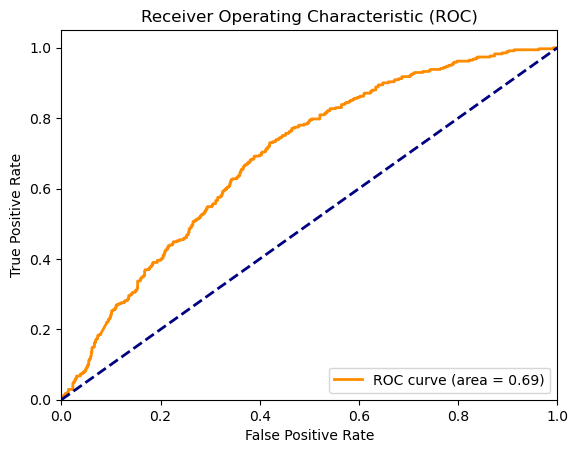

In [7]:
# Classification of subtype 2 and TC

SVM(x2, y2, kernel = kernel, C=1)


Optimal decision threshold: 0.17
Precision: 0.24
Recall: 0.99
Balanced accuracy: 0.50
Accuracy: 0.25
ROC AUC: 0.50


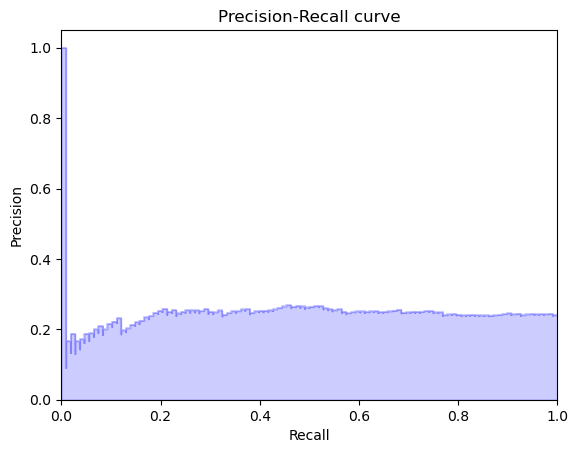

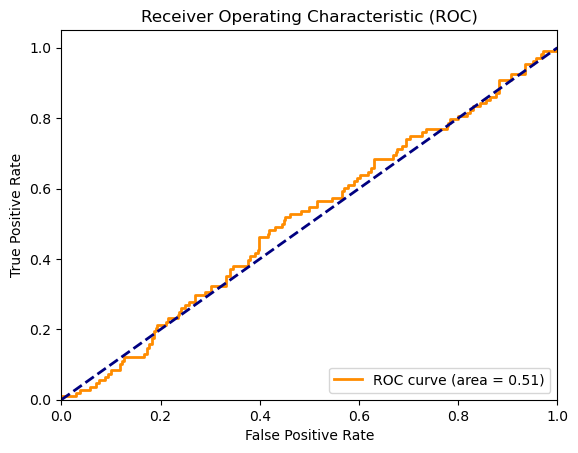

In [9]:
# Classification between subtypes (without TC)

SVM(x1and2, y1and2, kernel=kernel, C=1)
